# Paytm - In Progress

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from tqdm.auto import tqdm
tqdm.pandas()
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/paytm/paytm.csv', engine='python')

In [3]:
# Know the shape of the loaded data
df.shape

(1006178, 27)

In [4]:
words = ["harassment", "fraud", "restructure", "covid19 relief", "force", "money cut", "unethical", "fake", "false promise", "shutdown",
         "moratorium", "no response", "scam", "no answer", "love", "responsive", "very bad", "machine learning", "algorithm", "delay", 
         "leveraging"]

In [5]:
processor = Processor('./../../data/config.json')

In [6]:
pre_df = df[df['date'] < '2020-02-01']
post_df = df[df['date'] >= '2020-02-01']

In [7]:
pre_result = processor.words_distribution(pre_df, words)

100%|██████████| 21/21 [6:17:18<00:00, 1078.00s/it]


In [8]:
pre_df.to_csv('./../../data/fintech/paytm/pre_wd.csv', index=False)

In [9]:
post_result = processor.words_distribution(post_df, words)

100%|██████████| 21/21 [6:16:45<00:00, 1076.45s/it]


In [10]:
post_df.to_csv('./../../data/fintech/paytm/post_wd.csv', index=False)

In [11]:
pre_result

,words,false_cnt,true_cnt,false_percent,true_percent
0,harassment,502294,265,99.947270,0.052730
1,fraud,482349,20210,95.978582,4.021418
2,restructure,502546,13,99.997413,0.002587
3,covid19 relief,502559,0,100.000000,0.000000
4,force,498877,3682,99.267350,0.732650
5,money cut,502547,12,99.997612,0.002388
6,unethical,502353,206,99.959010,0.040990
7,fake,492519,10040,98.002225,1.997775
8,false promise,502443,116,99.976918,0.023082
9,shutdown,502478,81,99.983882,0.016118


<AxesSubplot: xlabel='true_cnt', ylabel='words'>

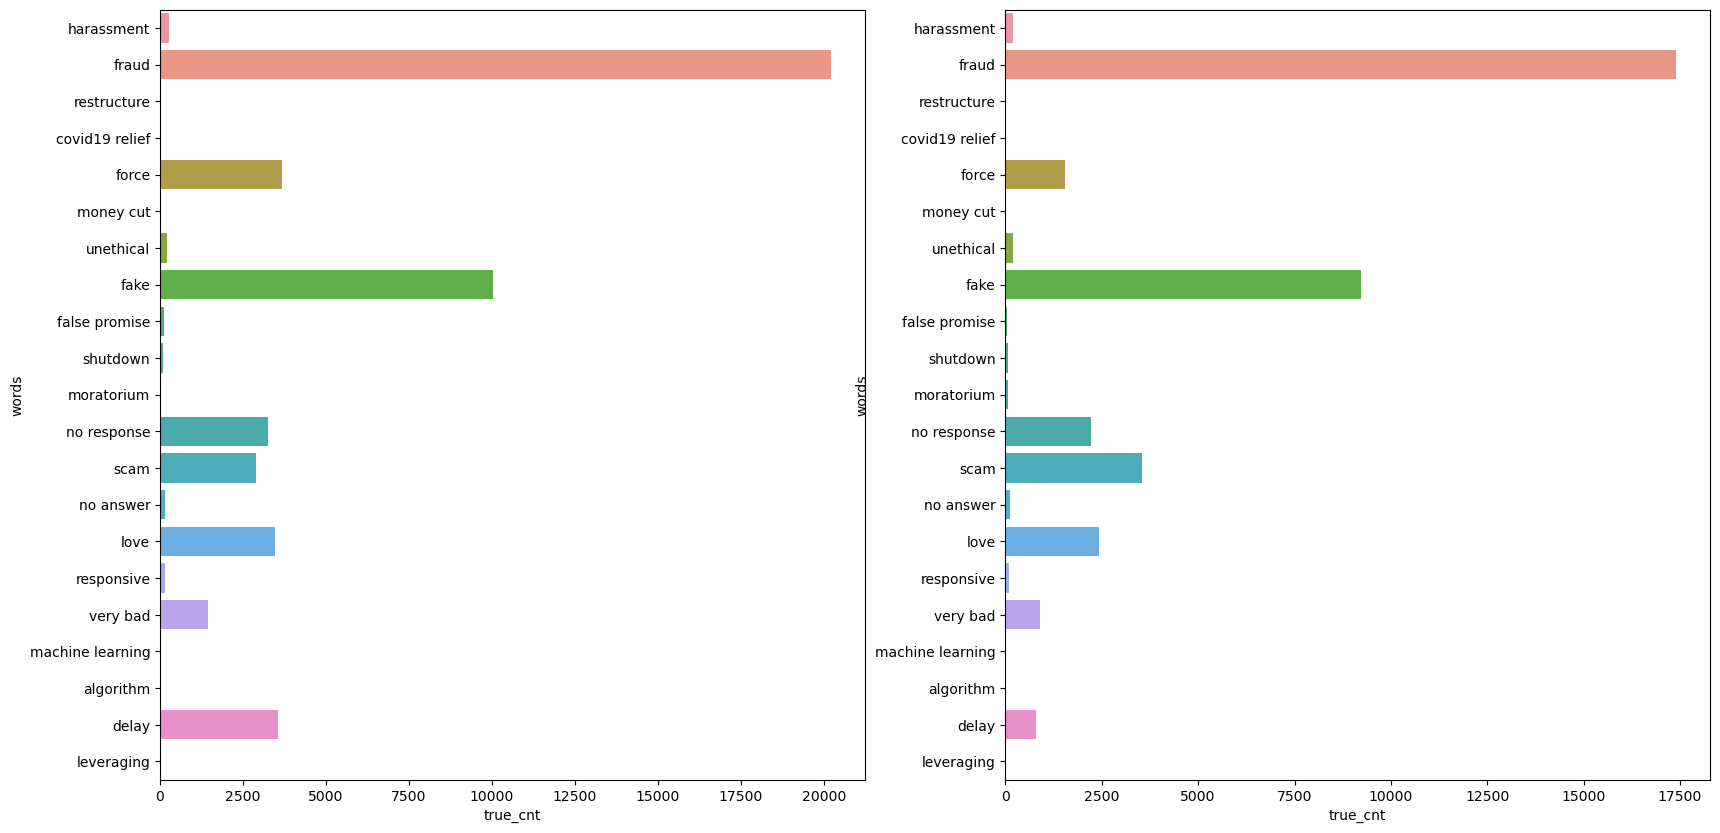

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='true_cnt', y='words', data=pre_result, orient='h', ax=axes[0])

sns.barplot(x='true_cnt', y='words', data=post_result, orient='h', ax=axes[1])